# <font color=#5779c1>Advanced Regression - Case study on Suprise Housing</font>

    
## <font color=#5779c1>Problem Statement</font>
    
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. 

##### <div class="alert alert-info">Required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.</div>

 

The company wants to know:

 - Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for `ridge` and `lasso regression`.

## <font color=#5779c1>Business Goal</font>

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## <font color=#5779c1>Data Definition</font>

 

The details of the various variables are available at 
[Data Defnition](url_here)

## <font color=#5779c1> Methodology</font>
 - Using the Exploratory Data analysis method to find the insights from the available data.
 - Find correlation and check for Multicollinearity and clean
 - model building
 - Build advance regression using ridge and lasso regression and compare the outcome
 
## <font color=#5779c1> This case study mainly divided in to 4 phases : </font>
1. Data understanding and exploration
2. Data Visualisation and preparation
3. Model building and evaluation(Linear, Ridge and Lasso Regression)


### <font color=#5779c1> 1. Data understanding, cleaning and exploration </font>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# reading the house sales in Australia dataset
house = pd.read_csv("train.csv")

#### <font color=#5ebbff>Data Exploration</font>

In [17]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
house.shape

(1460, 81)

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
#Fetch for null values columns
nans_indices = house.columns[house.isna().any()].tolist()
nans_indices

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [21]:
# Checking the percentage of missing values
round(100*(house[nans_indices].isnull().sum()/len(house.index)), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [22]:
house.describe()      #other atributes of the dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### <font color=#5ebbff>Null value treatment from data description shared by customer to add meaningful insights to data </font>

In [23]:
house['Alley'].fillna('No Alley Access', inplace=True)
house['MasVnrType'].fillna('None', inplace=True) 
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['PoolQC'].fillna('No Pool', inplace=True)
house['Fence'].fillna('No Fence', inplace=True) 
house['MasVnrArea'].fillna(0, inplace=True) 
house['LotFrontage'].fillna(0, inplace=True) 
house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 
house['BsmtQual'].fillna('No Basement', inplace=True) 
house['BsmtCond'].fillna('No Basement', inplace=True) 
house['BsmtExposure'].fillna('No Basement', inplace=True) 
house['BsmtFinType1'].fillna('No Basement', inplace=True) 
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house['GarageYrBlt'].fillna(2023, inplace=True)

In [24]:
#converting year to number of years
house.eval("YearBuilt = 2023 - YearBuilt", inplace=True)
house.eval("YearRemodAdd = 2023 - YearRemodAdd", inplace=True)
house.eval("GarageYrBlt = 2023 - GarageYrBlt", inplace=True)
house.eval("YrSold = 2023 - YrSold", inplace=True)

In [25]:
#converting from int type to object to treat the variables as categorical variables from data description file shared by customer
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [26]:
house.shape

(1460, 81)

In [27]:
# Checking the percentage of missing values
round(100*(house[nans_indices].isnull().sum()/len(house.index)), 2)

LotFrontage      0.00
Alley            0.00
MasVnrType       0.00
MasVnrArea       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinType2     0.00
Electrical       0.07
FireplaceQu      0.00
GarageType       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageQual       0.00
GarageCond       0.00
PoolQC           0.00
Fence            0.00
MiscFeature     96.30
dtype: float64

In [28]:
index_electrical = house[house['Electrical'].isnull()].index
house.drop(index_electrical , inplace=True)

In [29]:
# MiscFeature column has almost 96.3% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

#### <font color=#5ebbff>Checking percentile to determine outliers from house data </font>

In [30]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,20,20,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,15,208500
1,2,80.0,9600,47,47,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,16,181500
2,3,68.0,11250,22,21,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,15,223500
3,4,60.0,9550,108,53,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,17,140000
4,5,84.0,14260,23,23,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,15,250000


In [31]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   YearBuilt      1459 non-null   int64  
 4   YearRemodAdd   1459 non-null   int64  
 5   MasVnrArea     1459 non-null   float64
 6   BsmtFinSF1     1459 non-null   int64  
 7   BsmtFinSF2     1459 non-null   int64  
 8   BsmtUnfSF      1459 non-null   int64  
 9   TotalBsmtSF    1459 non-null   int64  
 10  1stFlrSF       1459 non-null   int64  
 11  2ndFlrSF       1459 non-null   int64  
 12  LowQualFinSF   1459 non-null   int64  
 13  GrLivArea      1459 non-null   int64  
 14  GarageYrBlt    1459 non-null   float64
 15  GarageArea     1459 non-null   int64  
 16  WoodDeckSF     1459 non-null   int64  
 17  OpenPorchSF    1459 non-null   int64  
 18  Enclosed

In [32]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop([ 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [33]:
# now checking columns
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   MasVnrArea     1459 non-null   float64
 4   BsmtFinSF1     1459 non-null   int64  
 5   BsmtFinSF2     1459 non-null   int64  
 6   BsmtUnfSF      1459 non-null   int64  
 7   TotalBsmtSF    1459 non-null   int64  
 8   1stFlrSF       1459 non-null   int64  
 9   2ndFlrSF       1459 non-null   int64  
 10  LowQualFinSF   1459 non-null   int64  
 11  GrLivArea      1459 non-null   int64  
 12  GarageArea     1459 non-null   int64  
 13  WoodDeckSF     1459 non-null   int64  
 14  OpenPorchSF    1459 non-null   int64  
 15  EnclosedPorch  1459 non-null   int64  
 16  3SsnPorch      1459 non-null   int64  
 17  ScreenPorch    1459 non-null   int64  
 18  PoolArea

In [34]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,57.612748,10517.363948,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,...,1515.546950,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,180930.394791
std,421.411181,34.673850,9984.666267,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,...,525.650927,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,79468.964025
min,1.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.500000,42.000000,7549.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,...,1129.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129950.000000
50%,730.000000,63.000000,9477.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1094.500000,79.000000,11603.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,...,1777.500000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1313.200000,92.000000,14388.400000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,...,2158.600000,757.200000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.100000,104.000000,17402.300000,456.000000,1274.000000,396.400000,1468.000000,1753.000000,1831.500000,1141.100000,...,2466.200000,850.200000,335.000000,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,326200.000000
99%,1445.420000,137.420000,37593.680000,791.360000,1572.420000,830.560000,1797.100000,2155.100000,2219.520000,1419.040000,...,3123.760000,1002.980000,505.520000,285.840000,261.100000,168.000000,268.100000,0.000000,700.000000,442629.620000


Now looking at the above percentile data we see the below variables have data that are not evenly spread:</br>
- PoolArea</br>
- EnclosedPorch</br>
- 3SsnPorch</br>
- ScreenPorch</br>
- MiscVal</br>
- SalePrice</br>
- MasVnrArea</br>

## <font color=#5779c1> Step 2: Data Visualisation and preparation</font>
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### <font color=#5ebbff>Visualising Numeric Variables for housing data </font>

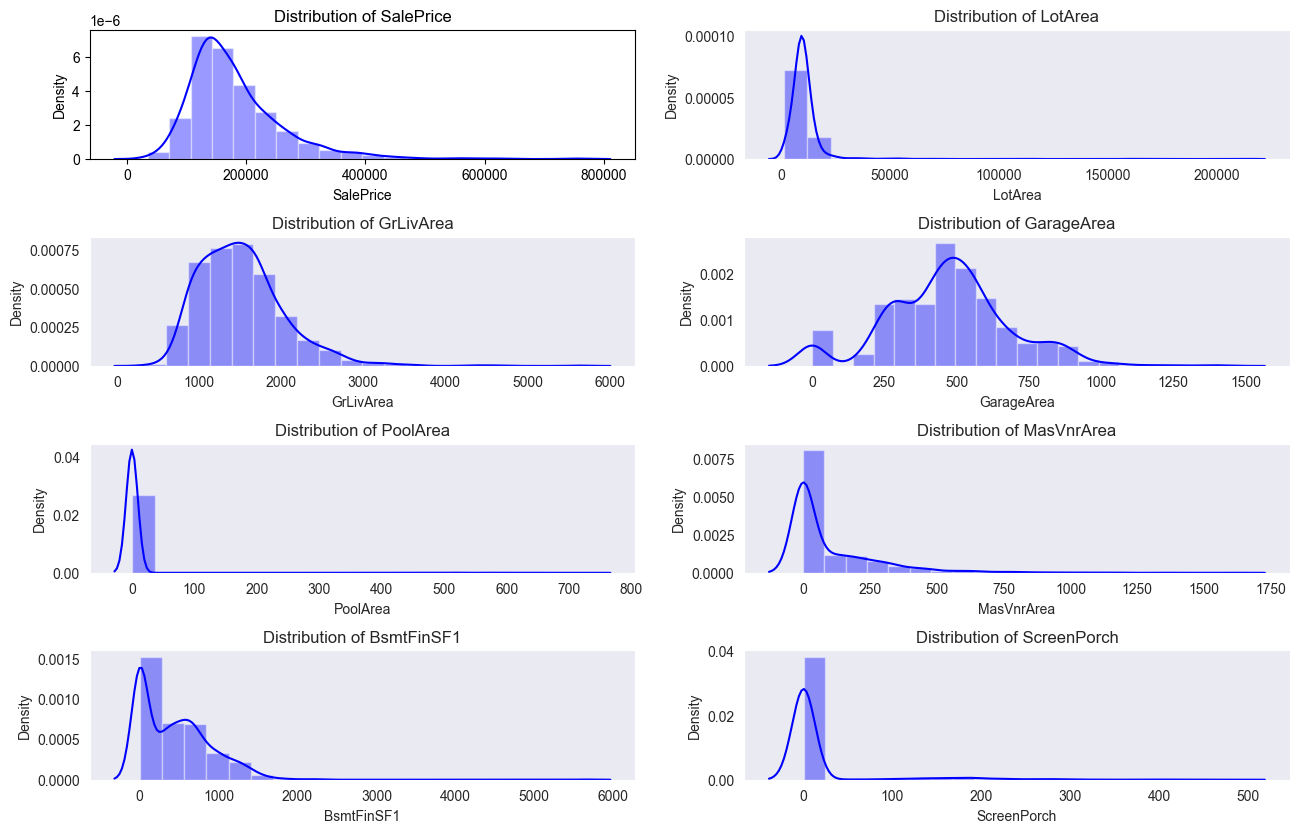

In [35]:
# Validating Continous variables for Outliers
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.set_palette("colorblind")
sns.set_style("dark")
sns.distplot(house.SalePrice, bins=20, color="blue")
plt.title("Distribution of SalePrice", fontsize=12)
plt.subplot(4,2,2)
sns.set_style("dark")
sns.distplot(house.LotArea, bins=20, color="blue")
plt.title("Distribution of LotArea", fontsize=12)
plt.subplot(4,2,3)
sns.set_style("dark")
sns.distplot(house['GrLivArea'], bins=20, color="blue")
plt.title("Distribution of GrLivArea", fontsize=12)
plt.subplot(4,2,4)
sns.set_style("dark")
sns.distplot(house.GarageArea, bins=20, color="blue")
plt.title("Distribution of GarageArea", fontsize=12)
plt.subplot(4,2,5)
sns.set_style("dark")
sns.distplot(house.PoolArea, bins=20, color="blue")
plt.title("Distribution of PoolArea", fontsize=12)
plt.subplot(4,2,6)
sns.set_style("dark")
sns.distplot(house.MasVnrArea, bins=20, color="blue")
plt.title("Distribution of MasVnrArea", fontsize=12)
plt.subplot(4,2,7)
sns.set_style("dark")
sns.distplot(house.BsmtFinSF1, bins=20, color="blue")
plt.title("Distribution of BsmtFinSF1", fontsize=12)
plt.subplot(4,2,8)
sns.set_style("dark")
sns.distplot(house.ScreenPorch, bins=20, color="blue")
plt.title("Distribution of ScreenPorch", fontsize=12)
plt.subplots_adjust(left=0.2,bottom=0.5,right=1,top=1,wspace=0.2, hspace=0.6)
plt.show()

#### <font color=#5ebbff>Checking the Correlation between the variables</font>

In [36]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.020248,-0.033170,-0.050515,-0.004001,-0.005668,-0.007508,-0.013815,0.011627,0.004885,...,0.008524,0.018010,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,-0.021756
LotFrontage,-0.020248,1.000000,0.100770,0.105202,0.076996,-0.009225,0.160976,0.238950,0.245613,0.042354,...,0.220436,0.201599,-0.016795,0.069836,0.027478,0.023536,0.023053,0.114135,-0.059583,0.209692
LotArea,-0.033170,0.100770,1.000000,0.103302,0.214121,0.111158,-0.002641,0.260962,0.299533,0.051030,...,0.263109,0.180392,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.263837
MasVnrArea,-0.050515,0.105202,0.103302,1.000000,0.260989,-0.071453,0.113719,0.359798,0.339605,0.174109,...,0.388012,0.370807,0.160026,0.122287,-0.110065,0.019100,0.062151,0.011903,-0.029550,0.472606
BsmtFinSF1,-0.004001,0.076996,0.214121,0.260989,1.000000,-0.050328,-0.495718,0.521963,0.445473,-0.136697,...,0.208088,0.296851,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,0.386436
BsmtFinSF2,-0.005668,-0.009225,0.111158,-0.071453,-0.050328,1.000000,-0.209395,0.104593,0.096948,-0.099146,...,-0.009686,-0.018295,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.011412
BsmtUnfSF,-0.007508,0.160976,-0.002641,0.113719,-0.495718,-0.209395,1.000000,0.415283,0.317827,0.004661,...,0.240210,0.183224,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.214446
TotalBsmtSF,-0.013815,0.238950,0.260962,0.359798,0.521963,0.104593,0.415283,1.000000,0.819393,-0.173973,...,0.455001,0.486719,0.232255,0.246764,-0.095938,0.037292,0.084275,0.126083,-0.018586,0.613905
1stFlrSF,0.011627,0.245613,0.299533,0.339605,0.445473,0.096948,0.317827,0.819393,1.000000,-0.202268,...,0.566084,0.489741,0.235582,0.211278,-0.065580,0.056042,0.088598,0.131526,-0.021167,0.605968
2ndFlrSF,0.004885,0.042354,0.051030,0.174109,-0.136697,-0.099146,0.004661,-0.173973,-0.202268,1.000000,...,0.687726,0.138531,0.092159,0.208418,0.062166,-0.024308,0.040738,0.081531,0.016240,0.319464


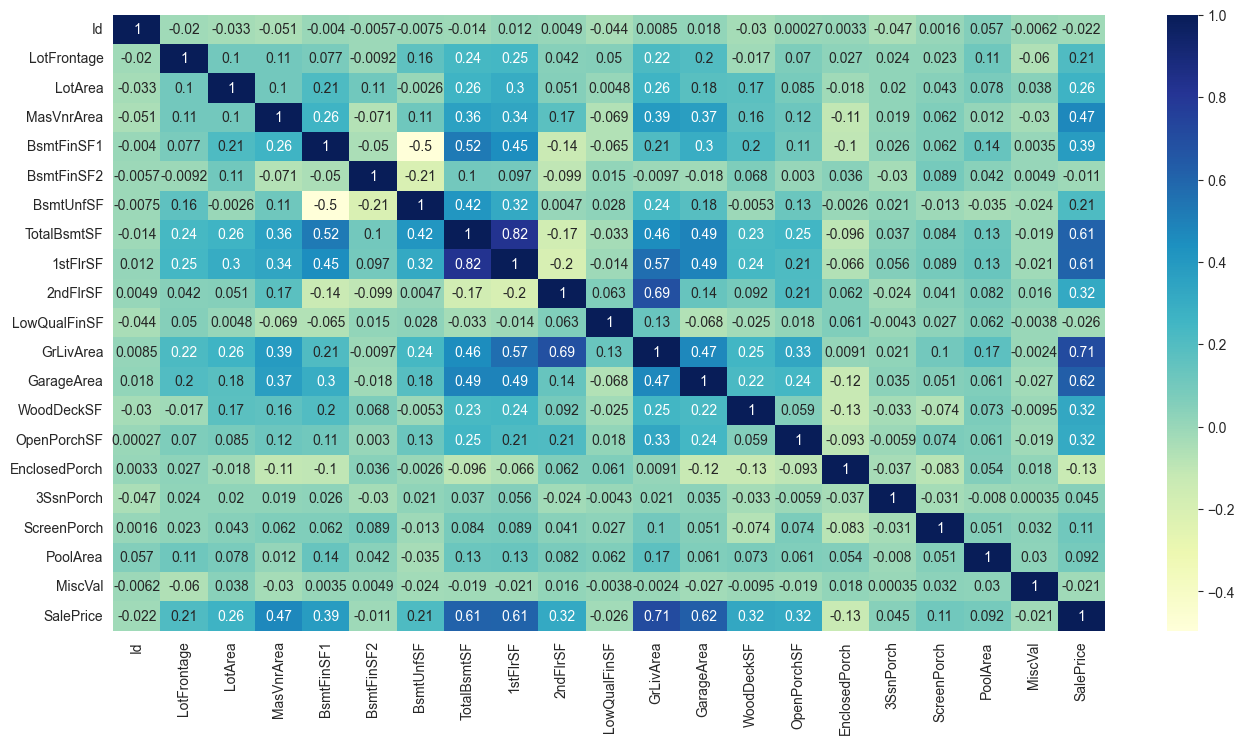

In [37]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

### <font color=#5779c1>Summarization:</font>
The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- GrLivArea  (Above grade (ground) living area square feet), GarageArea (Size of garage in square feet),1stFlrSF (First Floor square feet), 2ndFlrSF (Second floor square feet), MasVnrArea, BsmtFinSF1, WoodDeckSF, OpenPorchSF  are highly (positively) correlated


Correlation among independent variables:</br>
Many independent variables are highly correlated : 
- 1stFlrSF, TotalBsmtSF,
- GrLivArea, 2ndFlrSF 
are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).


## <font color=#5779c1>Visualizing/Understanding Categorical Data</font>

In [38]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical=house.select_dtypes(exclude=['float64','datetime64','int64'])
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [39]:
#MSSubClass: Identifies the type of dwelling involved in the sale.
house_categorical['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

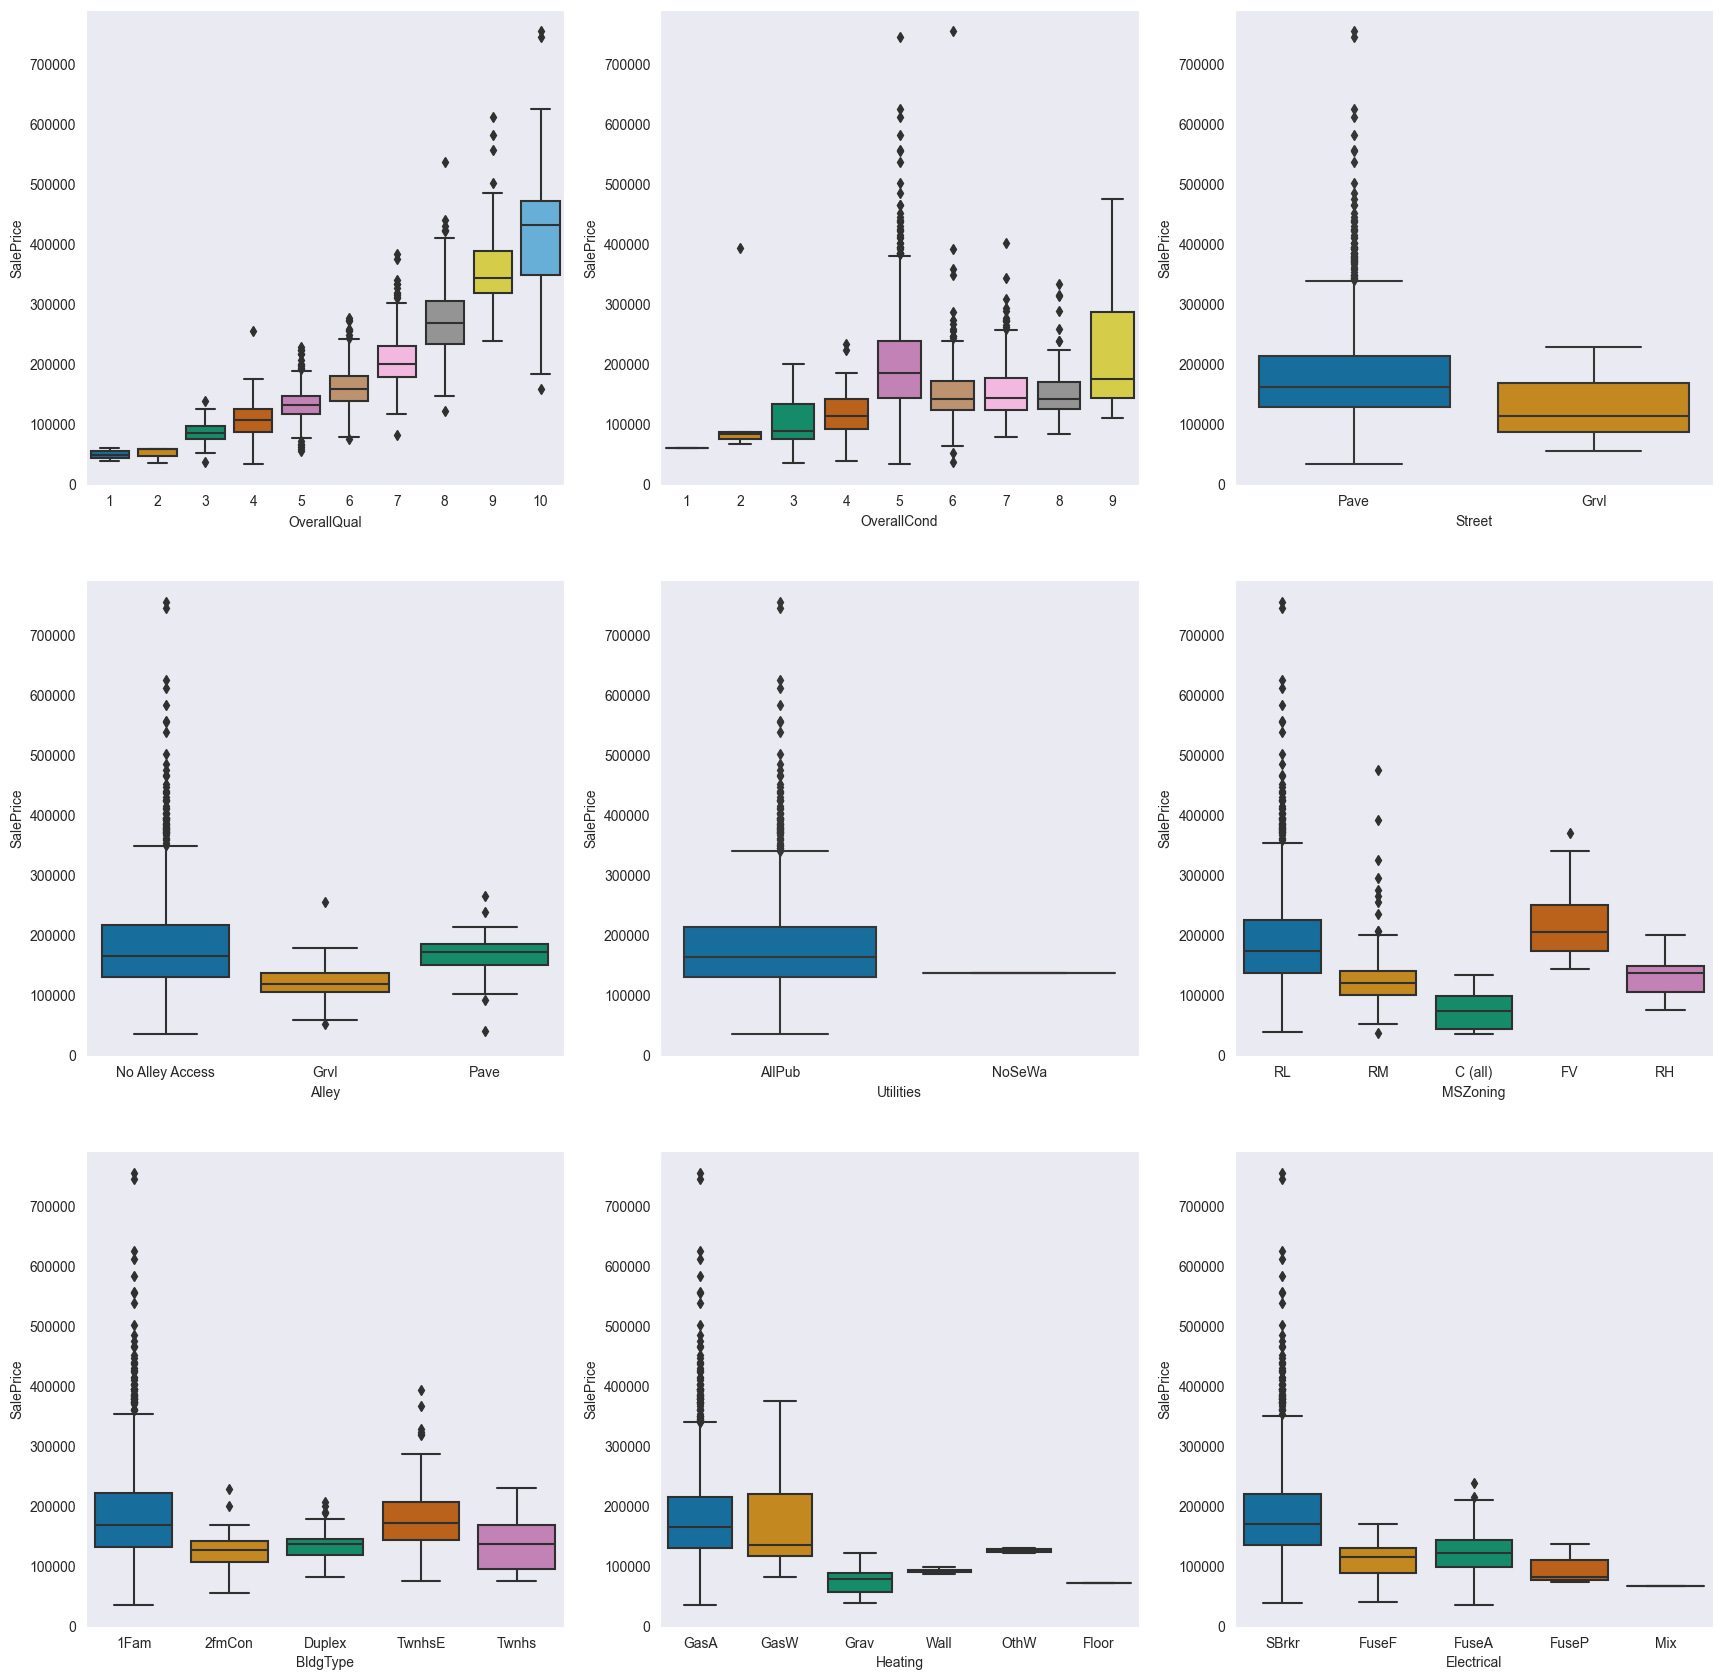

In [40]:
# Some of the categorical values are listed in graph below
# Making boxplot to compare the relation between the SalePrice and the categorical values
plt.figure(figsize=(21, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house)
plt.subplot(3,3,2)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = house)
plt.subplot(3,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house)
plt.subplot(3,3,4)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = house)
plt.subplot(3,3,5)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house)
plt.subplot(3,3,6)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
plt.subplot(3,3,7)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)
plt.subplot(3,3,8)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house)
plt.subplot(3,3,9)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)
plt.show()

### <font color=#5779c1>Summarization:</font>
- We see there is possitive growth in price based on OverallQuality
- Type of dwelling, Heating, etc

Let's now prepare the data and build the model.

<font color=#5779c1> Dummy Variables</font>

In [41]:
# Defining the map function
def binary_street_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
house[['Street']] = house[['Street']].apply(binary_street_map)

# Defining the map function
def binary_utilities_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
house[['Utilities']] = house[['Utilities']].apply(binary_utilities_map)

# Defining the map function
def binary_centralair_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
house[['CentralAir']] = house[['CentralAir']].apply(binary_centralair_map)

In [42]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical=house.select_dtypes(exclude=['float64','datetime64','int64'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley Access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley Access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley Access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley Access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley Access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [43]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
# drop categorical variables 
house = house.drop(list(house_categorical.columns), axis=1)

In [45]:
# concat dummy variables with X
house = pd.concat([house, house_dummies], axis=1)

In [46]:
house.shape

(1459, 314)

In [47]:
house.head()

,Id,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,1,1,20,20,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,1,1,47,47,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,1,1,22,21,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,1,1,108,53,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,1,1,23,23,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


## <font color=#5779c1>3. Model Building and Evaluation</font>


In [48]:
# split into X and y
#y = house.pop('SalePrice')
#X = house.drop(['Id'], axis=1)
X = house
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

In [49]:
X = X.fillna(X.interpolate())

In [50]:
# scaling the features

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [51]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [52]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

9.076854837270357
[ 2.41796904e-06  1.04732517e-05  2.03108256e-06  8.52534975e-02
  2.41278208e-01 -2.02242026e-03 -8.37773363e-04  2.86135754e-05
  4.11218472e-05  4.37616613e-05 -1.41742711e-05  7.07084951e-05
  5.17753402e-02  9.14827608e-05  1.22254589e-04 -5.04691864e-05
  1.63268112e-04  4.75526285e-04  1.83066244e-04  9.05267194e-05
  6.74823555e-05  6.21309389e-05  2.41196008e-04  1.71698575e-04
  1.35361535e-03  4.11475636e-06 -5.65359853e-04  2.49146033e-03
 -6.91705620e-02 -1.30552959e-01 -7.87265887e-02 -4.46888141e-02
 -6.70557482e-02 -6.97002148e-03 -1.20272902e-01 -5.39808195e-02
 -5.90806250e-02 -3.30356403e-02 -5.23443777e-02 -1.89880943e-01
 -8.85307968e-02 -6.15136431e-02  5.40963501e-01  4.99853661e-01
  4.86454369e-01  4.54452363e-01  2.83644170e-02  5.83701347e-02
  1.54503490e-02  2.61546698e-02  1.10601371e-02  3.03601719e-02
  2.53913793e-02  3.34559820e-02  2.83007302e-02 -4.17075594e-02
 -1.36763662e-01 -1.70905713e-02  1.55049963e-02 -1.12811663e-01
  8.894

In [54]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: "+ str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: "+ str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr: "+ str(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr: "+ str(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: "+ str(mse_train_lr))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: "+ str(mse_test_lr))
metric.append(mse_test_lr**0.5)

r2_train_lr: 0.9589380068670675
r2_test_lr: 0.7240972379206518
rss1_lr: 6.849184345554936
rss2_lr: 18.188383640923078
mse_train_lr: 0.006708309838937254
mse_test_lr: 0.041525990047769586


### <font color=#5779c1>Ridge and Lasso Regression</font>
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### <font color=#5779c1>Ridge Regression¶</font>

In [119]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,
                    0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,15.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
#checking the value of optimum number of parameters
print("best_params_:" +str(ridge_model_cv.best_params_))
print("best_score_: "+ str(ridge_model_cv.best_score_))

best_params_:{'alpha': 10.0}
best_score_: -0.09147509787166223


In [121]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028438,0.004926,0.009548,0.005168,0.0001,{'alpha': 0.0001},-0.086856,-0.103279,-0.100856,-0.100903,...,-0.098316,0.005848,39,-0.056553,-0.050780,-0.050395,-0.055849,-0.053666,-0.053449,0.002526
1,0.027088,0.011069,0.012157,0.006469,0.0002,{'alpha': 0.0002},-0.086833,-0.103263,-0.100842,-0.100977,...,-0.098320,0.005859,41,-0.056555,-0.050782,-0.050397,-0.055866,-0.053681,-0.053456,0.002529
2,0.031419,0.002534,0.014436,0.009540,0.0003,{'alpha': 0.0003},-0.086810,-0.103247,-0.100829,-0.101037,...,-0.098321,0.005870,42,-0.056557,-0.050784,-0.050399,-0.055881,-0.053694,-0.053463,0.002531
3,0.036203,0.009713,0.009471,0.005559,0.0004,{'alpha': 0.0004},-0.086788,-0.103232,-0.100816,-0.101085,...,-0.098319,0.005879,40,-0.056559,-0.050786,-0.050400,-0.055894,-0.053705,-0.053469,0.002534
4,0.032860,0.001596,0.006159,0.006337,0.0005,{'alpha': 0.0005},-0.086766,-0.103216,-0.100803,-0.101126,...,-0.098316,0.005888,38,-0.056561,-0.050788,-0.050402,-0.055905,-0.053716,-0.053474,0.002536
5,0.036683,0.005952,0.009718,0.002258,0.0006,{'alpha': 0.0006},-0.086744,-0.103201,-0.100791,-0.101160,...,-0.098312,0.005896,37,-0.056563,-0.050790,-0.050403,-0.055915,-0.053725,-0.053479,0.002537
6,0.038689,0.006882,0.008469,0.006046,0.0007,{'alpha': 0.0007},-0.086722,-0.103185,-0.100779,-0.101188,...,-0.098306,0.005903,36,-0.056564,-0.050791,-0.050405,-0.055923,-0.053734,-0.053483,0.002539
7,0.037909,0.007297,0.010019,0.006659,0.0008,{'alpha': 0.0008},-0.086700,-0.103170,-0.100767,-0.101212,...,-0.098299,0.005910,35,-0.056566,-0.050793,-0.050406,-0.055931,-0.053742,-0.053488,0.002540
8,0.027923,0.006600,0.006264,0.007672,0.0009,{'alpha': 0.0009},-0.086678,-0.103154,-0.100756,-0.101233,...,-0.098292,0.005917,34,-0.056568,-0.050795,-0.050407,-0.055937,-0.053749,-0.053491,0.002541
9,0.035681,0.003118,0.011323,0.009421,0.001,{'alpha': 0.001},-0.086656,-0.103139,-0.100744,-0.101251,...,-0.098284,0.005924,33,-0.056570,-0.050797,-0.050409,-0.055943,-0.053756,-0.053495,0.002542


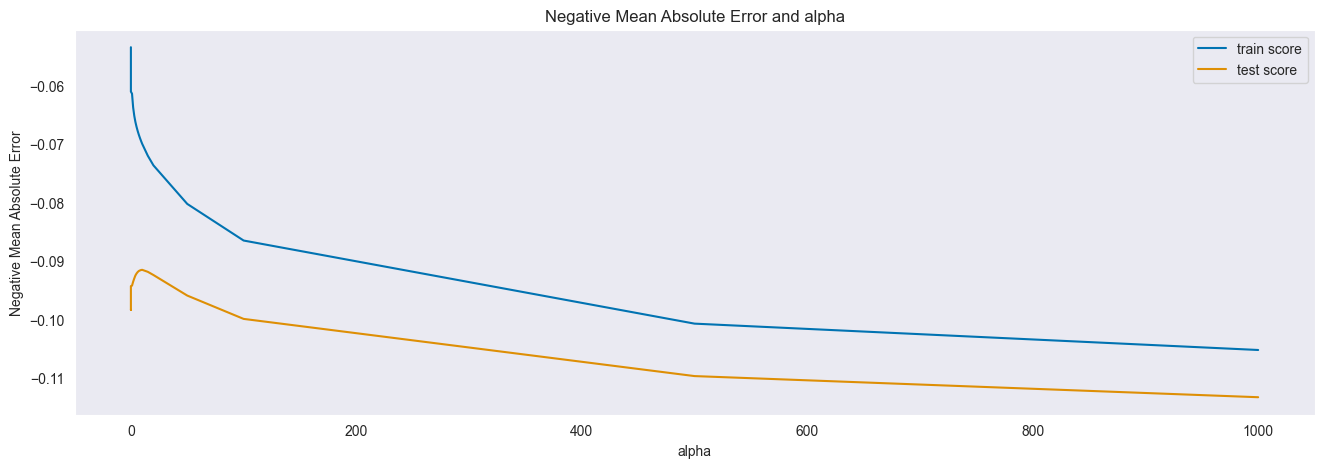

In [122]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**from the above graph and the bestparam score we got optimum lambda to be 10**

In [123]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.04656742e-06, -1.16224575e-04,  1.83837316e-06,  4.68306352e-02,
        9.01318491e-03, -1.91457914e-03, -1.40432396e-03,  2.35640618e-06,
        2.28395451e-06,  5.35145164e-05, -1.51078619e-05,  4.06906026e-05,
        7.09158039e-02,  4.85597872e-05,  1.08390013e-04,  2.98180135e-05,
        1.86767811e-04,  4.79704047e-04,  1.01592971e-04,  1.06365673e-04,
        3.52279040e-05,  1.04216906e-04,  2.44719619e-04,  2.16751166e-04,
       -8.19242239e-04,  2.82363965e-06, -3.78317092e-04,  3.31387589e-03,
       -5.86614574e-02, -9.46759565e-03,  1.87488508e-02,  9.36691509e-04,
       -3.88538652e-02,  4.15136406e-02,  2.52780239e-02, -1.30278348e-03,
        6.39419060e-03,  6.87746767e-03, -7.30346909e-03, -7.21890424e-02,
       -1.97767184e-02, -8.66428907e-03,  6.78542160e-02,  4.23713677e-02,
        6.48140824e-02,  3.11027649e-02,  4.95049088e-03,  3.67623508e-02,
        1.31334634e-02, -3.83757980e-02,  6.97668714e-03,  4.31117918e-02,
        1.76953481e-02,  

In [124]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print("Using Ridge Regression: R-squared value of train data: "+str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

Using Ridge Regression: R-squared value of train data: 0.9305741606651067


In [125]:
#lets predict the R-squared value of test data
y_test_pred = ridge.predict(X_test)
print("Using Ridge Regression: R-squared value of test data: "+str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

Using Ridge Regression: R-squared value of test data: 0.8573195761185053


In [126]:
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.02147476095368163


In [127]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("Metrics obtained by applying Ridge Regression for the data")
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: "+ str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: "+ str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr: "+str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr: "+ str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: "+str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: "+str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

Metrics obtained by applying Ridge Regression for the data
r2_train_lr: 0.9305741606651067
r2_test_lr: 0.8573195761185053
rss1_lr: 11.58030421003106
rss2_lr: 9.405945297712554
mse_train_lr: 0.011342119696406522
mse_test_lr: 0.02147476095368163


### <font color=#5779c1>Lasso Regression </font>

In [128]:
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.469827,0.203117,0.008325,0.007140,0.0001,{'alpha': 0.0001},-0.076481,-0.089547,-0.093490,-0.090525,...,-0.085945,0.006628,4,-0.060124,-0.055294,-0.054616,-0.059151,-0.058013,-0.057440,0.002147
1,0.403803,0.222809,0.007329,0.007166,0.0002,{'alpha': 0.0002},-0.074789,-0.088861,-0.095392,-0.088736,...,-0.084780,0.007997,1,-0.063258,-0.058109,-0.057295,-0.061909,-0.061443,-0.060403,0.002299
2,0.463540,0.188182,0.010091,0.009608,0.0003,{'alpha': 0.0003},-0.075049,-0.088722,-0.096984,-0.090437,...,-0.085458,0.008535,2,-0.066403,-0.060607,-0.059399,-0.064242,-0.063774,-0.062885,0.002543
3,0.378181,0.246764,0.015565,0.005925,0.0004,{'alpha': 0.0004},-0.076110,-0.089146,-0.096338,-0.091192,...,-0.085801,0.008210,3,-0.069112,-0.063056,-0.060999,-0.065747,-0.065761,-0.064935,0.002750
4,0.226239,0.184654,0.015208,0.004192,0.0005,{'alpha': 0.0005},-0.077452,-0.090313,-0.096857,-0.092441,...,-0.086601,0.008372,5,-0.071621,-0.065467,-0.062405,-0.067197,-0.067678,-0.066874,0.003008
5,0.194562,0.164568,0.009463,0.008151,0.0006,{'alpha': 0.0006},-0.079127,-0.091250,-0.097943,-0.092916,...,-0.087464,0.008400,6,-0.073581,-0.067354,-0.063735,-0.068134,-0.069264,-0.068414,0.003178
6,0.207379,0.149025,0.014010,0.003427,0.0007,{'alpha': 0.0007},-0.080838,-0.091775,-0.098774,-0.093304,...,-0.088267,0.008226,7,-0.075620,-0.068854,-0.064957,-0.069055,-0.070775,-0.069852,0.003456
7,0.171086,0.123917,0.009089,0.007280,0.0008,{'alpha': 0.0008},-0.082931,-0.092271,-0.099632,-0.093485,...,-0.089120,0.007974,8,-0.077590,-0.070328,-0.066226,-0.069992,-0.072316,-0.071290,0.003715
8,0.149564,0.137369,0.013172,0.006271,0.0009,{'alpha': 0.0009},-0.085289,-0.092902,-0.100702,-0.093793,...,-0.090170,0.007740,9,-0.079413,-0.071871,-0.067555,-0.070995,-0.073874,-0.072742,0.003911
9,0.162548,0.140650,0.008172,0.006765,0.001,{'alpha': 0.001},-0.085970,-0.093575,-0.101794,-0.094255,...,-0.090968,0.007710,10,-0.080413,-0.073428,-0.068992,-0.072014,-0.075552,-0.074080,0.003817


In [130]:
#checking the value of optimum number of parameters
print("Using Lasso: best_params_: "+ str(lasso_model_cv.best_params_))
print("Using Lasso: best_score_:"+ str(lasso_model_cv.best_score_))

Using Lasso: best_params_: {'alpha': 0.0002}
Using Lasso: best_score_:-0.08477953024310762


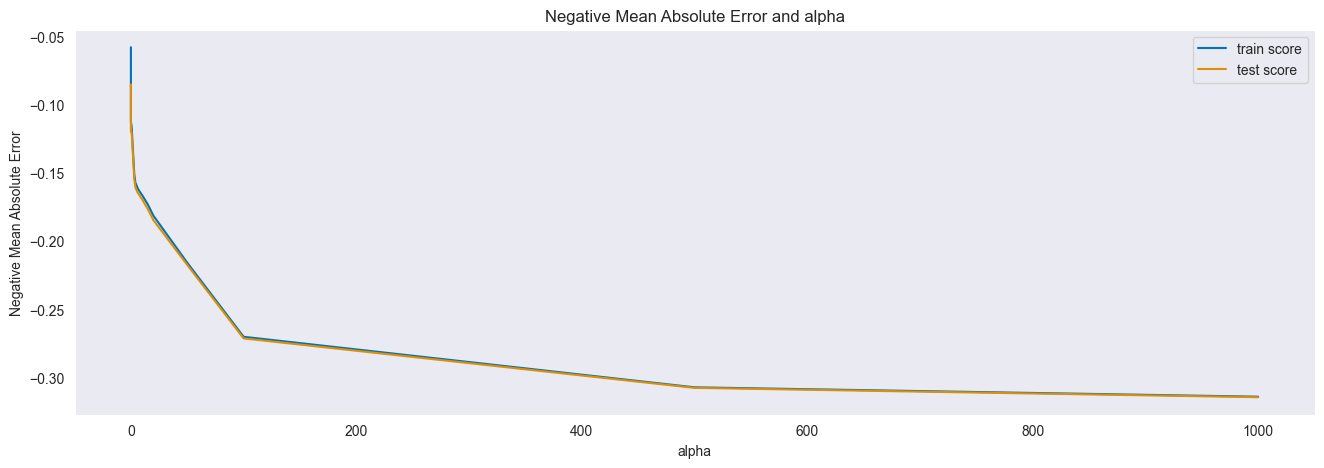

In [99]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**from the above graph and the bestparam score we got optimum lambda to be 0.0002**

In [134]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [135]:
lasso.coef_

array([-5.21944319e-08,  4.28619006e-05,  1.64431914e-06,  6.46262442e-02,
        0.00000000e+00, -1.97264989e-03, -1.30137953e-03,  1.82317016e-05,
        1.00813400e-04,  1.21815654e-04,  4.22635090e-05,  2.64225517e-05,
        6.10949023e-02,  2.07466591e-04,  2.61597649e-04,  9.13462619e-05,
        3.45426748e-05,  3.50119075e-04,  1.69301176e-04,  9.60249083e-05,
        6.07671906e-05,  5.27952533e-05,  2.11054212e-04,  1.66583399e-04,
       -1.97659800e-04,  2.63484119e-06, -7.78229262e-04,  2.52724997e-03,
       -6.22112123e-02, -0.00000000e+00,  2.01381878e-03, -0.00000000e+00,
       -3.00174354e-02,  2.52480986e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -8.41134988e-02,
       -0.00000000e+00, -2.05089076e-02,  2.91288044e-01,  2.68727621e-01,
        2.59400079e-01,  2.33140365e-01,  1.09742171e-02,  4.19772524e-02,
        7.51962272e-03, -0.00000000e+00,  6.47046892e-03,  2.08167119e-02,
        0.00000000e+00,  

In [136]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9506620467352478


In [137]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.702000135876714


In [138]:
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.044851814090434365


In [139]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("Metrics obtained by applying Lasso Regression for the data")
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: "+str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: "+str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr: "+str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr: "+str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: "+str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: "+str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

Metrics obtained by applying Lasso Regression for the data
r2_train_lr: 0.9506620467352478
r2_test_lr: 0.702000135876714
rss1_lr: 8.22962334167945
rss2_lr: 19.64509457161025
mse_train_lr: 0.008060355868442164
mse_test_lr: 0.044851814090434365


In [140]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.958938,0.930574,0.950662
1,R2 Score (Test),0.724097,0.857320,0.702000
2,RSS (Train),6.849184,11.580304,8.229623
3,RSS (Test),18.188384,9.405945,19.645095
4,MSE (Train),0.081904,0.106499,0.089779
5,MSE (Test),0.203779,0.146543,0.211782


### <font color=#5779c1>Summarization:</font>
The table summarizes the performance metrics of three different regression techniques - Linear Regression, Ridge Regression, and Lasso Regression.

- R2 Score (Train): Linear Regression has the highest R2 score (0.958938), followed by Ridge Regression (0.930574), and then Lasso Regression (0.950662), indicating that Linear Regression performs slightly better than Ridge and Lasso in terms of explaining the variability in the training data.

- R2 Score (Test): Ridge Regression has the highest R2 score (0.857320) on the test data, followed by Linear Regression (0.724097), and then Lasso Regression (0.702000), indicating that Ridge Regression performs better than Linear and Lasso in terms of generalization to unseen data.

- RSS (Train): Linear Regression has the lowest Residual Sum of Squares (RSS) on the training data (6.849184), followed by Ridge Regression (11.580304), and then Lasso Regression (8.229623), indicating that Linear Regression has the lowest residual errors on the training data.

- RSS (Test): Ridge Regression has the lowest RSS on the test data (9.405945), followed by Lasso Regression (19.645095), and then Linear Regression (18.188384), indicating that Ridge Regression has the lowest residual errors on the test data.

- MSE (Train): Linear Regression has the lowest Mean Squared Error (MSE) on the training data (0.081904), followed by Ridge Regression (0.106499), and then Lasso Regression (0.089779), indicating that Linear Regression has the lowest average squared error on the training data.

- MSE (Test): Ridge Regression has the lowest MSE on the test data (0.146543), followed by Linear Regression (0.203779), and then Lasso Regression (0.211782), indicating that Ridge Regression has the lowest average squared error on the test data.

## Lets observe the changes in the coefficients after regularization

In [141]:
betas = pd.DataFrame(index=X.columns)

In [142]:
betas.rows = X.columns

In [143]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [146]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
Id,2.417969e-06,-0.000004,-5.219443e-08
LotFrontage,1.047325e-05,-0.000116,4.286190e-05
LotArea,2.031083e-06,0.000002,1.644319e-06
Street,8.525350e-02,0.046831,6.462624e-02
Utilities,2.412782e-01,0.009013,0.000000e+00
YearBuilt,-2.022420e-03,-0.001915,-1.972650e-03
YearRemodAdd,-8.377734e-04,-0.001404,-1.301380e-03
MasVnrArea,2.861358e-05,0.000002,1.823170e-05
BsmtFinSF1,4.112185e-05,0.000002,1.008134e-04
BsmtFinSF2,4.376166e-05,0.000054,1.218157e-04


### <font color=#5779c1>Summarization:</font>
The table shows the changes in coefficients after performing regression using three different methods: linear, ridge, and lasso. The coefficients represent the relationship between the predictor variables and the response variable. In linear regression, the coefficients are positive or negative values that indicate the direction and magnitude of the relationship. In ridge regression and lasso regression, the coefficients are adjusted to account for overfitting and reduce the complexity of the model.

The changes in the coefficients vary depending on the predictor variable and the type of regression. In general, ridge regression and lasso regression tend to shrink the coefficients towards zero, while linear regression produces larger coefficients.

For example, the coefficient for MSZoning_FV is 5.4 in linear regression, but only 0.06 in ridge regression and 0.29 in lasso regression. Similarly, the coefficient for PoolArea is positive in linear regression, but negative in ridge regression and lasso regression, indicating that these methods have adjusted the coefficient to account for overfitting.

Overall, the changes in the coefficients highlight the importance of selecting an appropriate regression method to avoid overfitting and produce accurate predictions.

**Q1.)** What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [147]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("Metrics obtained by applying Ridge Regression for the data")
metric21 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: "+ str(r2_train_lr))
metric21.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: "+ str(r2_test_lr))
metric21.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr: "+str(rss1_lr))
metric21.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr: "+ str(rss2_lr))
metric21.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: "+str(mse_train_lr))
metric21.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: "+str(mse_test_lr))
metric21.append(mse_test_lr**0.5)

Metrics obtained by applying Ridge Regression for the data
r2_train_lr: 0.9214225198085768
r2_test_lr: 0.8496443564959273
rss1_lr: 13.106807687048441
rss2_lr: 9.911920076550178
mse_train_lr: 0.012837225942260961
mse_test_lr: 0.02262995451267164


In [148]:
alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 



y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("Metrics obtained by applying Lasso Regression for the data")
metric31 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: "+str(r2_train_lr))
metric31.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: "+str(r2_test_lr))
metric31.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr: "+str(rss1_lr))
metric31.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr: "+str(rss2_lr))
metric31.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr: "+str(mse_train_lr))
metric31.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr: "+str(mse_test_lr))
metric31.append(mse_test_lr**0.5)

Metrics obtained by applying Lasso Regression for the data
r2_train_lr: 0.9418624757015026
r2_test_lr: 0.7376548020133225
rss1_lr: 9.697401195930478
rss2_lr: 17.294626089909592
mse_train_lr: 0.009497944364280586
mse_test_lr: 0.03948544769385751


In [149]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric2 = pd.Series(metric2, name = 'Ridge Regression at alpha=10')
rg_metric21 = pd.Series(metric21, name = 'Ridge Regression at alpha=20')
ls_metric3 = pd.Series(metric3, name = 'Lasso Regression at alpha=0.0002')
ls_metric31 = pd.Series(metric31, name = 'Lasso Regression at alpha=0.0004')

final_metric = pd.concat([lr_metric, rg_metric2, rg_metric21, ls_metric3, ls_metric31], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression at alpha=10,Ridge Regression at alpha=20,Lasso Regression at alpha=0.0002,Lasso Regression at alpha=0.0004
0,R2 Score (Train),0.958938,0.930574,0.921423,0.950662,0.941862
1,R2 Score (Test),0.724097,0.857320,0.849644,0.702000,0.737655
2,RSS (Train),6.849184,11.580304,13.106808,8.229623,9.697401
3,RSS (Test),18.188384,9.405945,9.911920,19.645095,17.294626
4,MSE (Train),0.081904,0.106499,0.113301,0.089779,0.097457
5,MSE (Test),0.203779,0.146543,0.150433,0.211782,0.198709


**Q3** After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [171]:
sorted_coef_indices = np.argsort(-np.abs(lasso.coef_))

In [172]:
sorted_coef = lasso.coef_[sorted_coef_indices]
predictor_names_sorted = X.columns[sorted_coef_indices]

In [174]:
betas_1 = pd.DataFrame(index=predictor_names_sorted)
betas_1.rows = predictor_names_sorted
betas_1['Lasso'] = sorted_coef
pd.set_option('display.max_rows', None)
#betas_1

,Lasso
PoolQC_Gd,-1.735128
Condition2_PosN,-0.475938
OverallCond_3,-0.180774
OverallQual_9,0.179395
Neighborhood_MeadowV,-0.148699
MSZoning_FV,0.130648
Neighborhood_Crawfor,0.125030
MSZoning_RL,0.114227
MSZoning_RH,0.103746
OverallQual_10,0.100294


In [185]:
#Build new model, drop PoolQC_Gd, Condition2_PosN, OverallCond_3, OverallQual_9, Neighborhood_MeadowV

X = house
y = np.log(X.SalePrice)
#drop PoolQC_Gd, Condition2_PosN, OverallCond_3, OverallQual_9, Neighborhood_MeadowV
X = X.drop(columns=["SalePrice", "PoolQC_Gd", "Condition2_PosN", "OverallCond_3", "OverallQual_9", "Neighborhood_MeadowV"] ,axis=1) # take out the target variable
X = X.fillna(X.interpolate())



In [186]:
# scaling the features
scaler = StandardScaler()
scaler.fit(X)
# split into train and test


StandardScaler()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [189]:
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv_1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_1.fit(X_train, y_train) 

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [191]:
cv_results = pd.DataFrame(lasso_model_cv_1.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.159487,0.034942,0.000598,0.001196,0.0001,{'alpha': 0.0001},-0.090357,-0.102348,-0.107459,-0.090626,...,-0.098463,0.006819,10,-0.066587,-0.063140,-0.060128,-0.061392,-0.064927,-0.063235,0.002331
1,0.140139,0.053797,0.003201,0.003050,0.0002,{'alpha': 0.0002},-0.087593,-0.100654,-0.111159,-0.091026,...,-0.097323,0.008224,9,-0.069625,-0.067906,-0.063718,-0.064576,-0.068814,-0.066928,0.002351
2,0.082483,0.050609,0.006256,0.007662,0.0003,{'alpha': 0.0003},-0.084305,-0.099921,-0.111579,-0.091920,...,-0.096376,0.009101,5,-0.072085,-0.070429,-0.065375,-0.067122,-0.071056,-0.069213,0.002539
3,0.058405,0.016882,0.002404,0.003879,0.0004,{'alpha': 0.0004},-0.083328,-0.101120,-0.110082,-0.092847,...,-0.096194,0.008951,2,-0.074443,-0.072326,-0.066785,-0.069342,-0.072704,-0.071120,0.002719
4,0.050771,0.015685,0.000000,0.000000,0.0005,{'alpha': 0.0005},-0.083730,-0.101831,-0.109169,-0.094000,...,-0.096217,0.008660,3,-0.076692,-0.073899,-0.068237,-0.071002,-0.074074,-0.072781,0.002900
5,0.044229,0.006750,0.000012,0.000024,0.0006,{'alpha': 0.0006},-0.084081,-0.102255,-0.108941,-0.094308,...,-0.096181,0.008640,1,-0.078444,-0.075059,-0.069668,-0.071994,-0.075208,-0.074075,0.003003
6,0.063463,0.027883,0.000000,0.000000,0.0007,{'alpha': 0.0007},-0.084594,-0.102705,-0.109089,-0.094859,...,-0.096301,0.008720,4,-0.079765,-0.075832,-0.070881,-0.072964,-0.076355,-0.075159,0.003040
7,0.040095,0.008764,0.000000,0.000000,0.0008,{'alpha': 0.0008},-0.085136,-0.102824,-0.109510,-0.095516,...,-0.096473,0.008833,6,-0.081019,-0.076552,-0.071903,-0.073952,-0.077638,-0.076213,0.003128
8,0.036383,0.012376,0.006400,0.007841,0.0009,{'alpha': 0.0009},-0.085633,-0.103111,-0.109859,-0.096065,...,-0.096713,0.008922,7,-0.082292,-0.077339,-0.072949,-0.074963,-0.078981,-0.077305,0.003229
9,0.035271,0.012748,0.000000,0.000000,0.001,{'alpha': 0.001},-0.086631,-0.103443,-0.110182,-0.096630,...,-0.097197,0.008777,8,-0.083485,-0.078267,-0.073919,-0.076068,-0.080303,-0.078408,0.003317


In [193]:
#checking the value of optimum number of parameters
print("Using Lasso: best_params_: "+ str(lasso_model_cv_1.best_params_))
print("Using Lasso: best_score_:"+ str(lasso_model_cv_1.best_score_))


Using Lasso: best_params_: {'alpha': 0.0006}
Using Lasso: best_score_:-0.0961807090394771


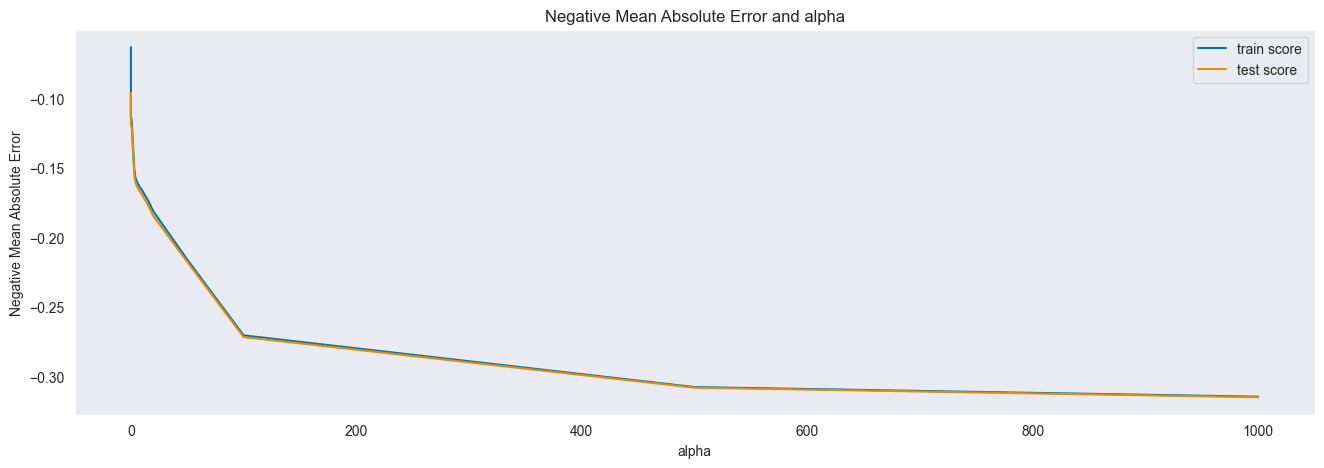

In [194]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [195]:
alpha = 0.0006

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.0006)

In [198]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print("Train Data: R2 Score: "+str(metrics.r2_score(y_true=y_train, y_pred=y_train_pred)))

#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print("Test Data: R2 score: "+  str(metrics.r2_score(y_true=y_test, y_pred=y_test_pred)))

print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))


Train Data: R2 Score: 0.9177822224684475
Test Data: R2 score: 0.8462967431379338
RMSE is:  0.02313380216515668


In [199]:
sorted_coef_indices = np.argsort(-np.abs(lasso.coef_))
sorted_coef = lasso.coef_[sorted_coef_indices]
predictor_names_sorted = X.columns[sorted_coef_indices]

betas_2 = pd.DataFrame(index=predictor_names_sorted)
betas_2.rows = predictor_names_sorted
betas_2['Lasso'] = sorted_coef
pd.set_option('display.max_rows', None)
betas_2

,Lasso
OverallQual_2,-0.154800
Fireplaces_3,-0.136769
Neighborhood_NridgHt,0.124278
Neighborhood_Crawfor,0.113207
MSSubClass_160,-0.112823
Neighborhood_StoneBr,0.110252
TotRmsAbvGrd_12,-0.108401
Exterior1st_BrkFace,0.092039
Fireplaces_2,0.080250
Functional_Typ,0.076335
